# Regression to classification problem

In [1]:
#DS Basics
import pandas as pd
import numpy as np
import matplotlib as mpl
#interactive decision tree
import matplotlib.pyplot as plt
#helpers
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
#discretization
import feature_engine.discretisers as feature_discretisers
from sklearn.inspection import plot_partial_dependence

import warnings
warnings.simplefilter('ignore')

In [2]:
#profiling
import pandas_profiling
from pandas_profiling import ProfileReport

In [3]:
#PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import scipy
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [5]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
mpl.rcParams['figure.figsize'] = (9,9)

from math import sqrt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.gaussian_process.kernels import RBF

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.svm import SVC, SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn import feature_selection

In [7]:
from sklearn.neighbors import KNeighborsClassifier

Let us try to discretize the limit bal make this into a classifcation problem & see what is the score we are obtaining. Ofcouse this is different approach. This can only be implemented after dicussing with sales team what are the consequence of it.

# Loading data & clean Up

In [8]:
credit = pd.read_csv("default of credit card clients.csv", header=1) 

Insted of the above you can also use skip rows to skip the rows. This can be seen below

In [9]:
# credit = pd.read_csv('default of credit card clients.csv', skiprows=1)

In [10]:
# If you want to remane any col, just assign that col to the new col name
# & delete the unwanted col
credit['default'] = credit['default payment next month']

In [11]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,default
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,default
2,3,90000,female,university,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,not default


In [12]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'default'],
      dtype='object')

In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  int64 
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_0                       30000 non-null  int64 
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [14]:
credit.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Preprocessing

In [15]:
credit = credit.drop(['ID','default payment next month'], axis=1)
#overriding data set with the same data set after removing duplicate 
credit = credit.drop_duplicates()
print(credit.isnull().sum())

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [16]:
credit['default'].describe()

count           29965
unique              2
top       not default
freq            23335
Name: default, dtype: object

Checking if ID value is unique

In [17]:
credit.shape

(29965, 24)

Converting non-numeric to numeric

A regression problem only use categorical features that are binary(ie two category).Here Sex, education, marriage & default are all categorical features. Sex & default have just two values in it. So it can be converted to numerical using label encoder.Since eduaction & marriage have four more than two categories, they need to using one-hot encoding   
Inverse transform can be used to reverse the encoding.
Note: if it is a classification problem we would not convert category to binary

In [18]:
# To encode the the col... lets say to convert the non-numeric
# to numeric u can use this
#Label encoding
le = LabelEncoder()
le.fit(credit['default'])
credit['default'] = le.transform(credit['default'])
credit['default']

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: default, Length: 29965, dtype: int32

In [19]:
credit['SEX'].describe()

count      29965
unique         2
top       female
freq       18091
Name: SEX, dtype: object

In [20]:
le = LabelEncoder()
le.fit(credit['SEX'])
credit['SEX'] = le.transform(credit['SEX'])
# credit['SEX_list']
#credit['SEX_list'] = le.inverse_transform(credit['SEX'])

In [21]:
le = LabelEncoder()
le.fit(credit['EDUCATION'])
credit['EDUCATION'] = le.transform(credit['EDUCATION'])

In [22]:
# convertedCol = credit.loc[:,'EDUCATION'] # selecting the required cols
# convertedCol
# convertedCol = pd.get_dummies(convertedCol)#converting them using dummies fn
# convertedCol.head()
# credit = pd.concat([credit,convertedCol],axis=1)
# credit.head()

In [23]:
# credit = credit.drop(['EDUCATION'],axis=1)

In [24]:
credit['PAY_0'] = credit['PAY_0'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)

credit['PAY_0'] = credit['PAY_0'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

If you want to discrete age, bill amount & payment use the below:

disc = feature_discretisers.EqualFrequencyDiscretiser(q =9,variables=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                                                                      'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])    
disc.fit(credit)
credit= disc.transform(credit)

disc = feature_discretisers.EqualFrequencyDiscretiser(q =5,variables=['AGE'])    
disc.fit(credit)
credit= disc.transform(credit)

disc.binner_dict_

In [112]:
# # credit['LIMIT_BAL'] = pd.cut(credit['LIMIT_BAL'], bins=5)
# # le = LabelEncoder()
# # le.fit(credit['LIMIT_BAL'])
# bin_labels_price=[20800,46000,604000,80200,1000000]
# credit['LIMIT_BAL'] = pd.cut(credit['LIMIT_BAL'], bins =5 ,labels= bin_labels_price)

Inordder to make this into a regression type problem, the limit bal need to be binned. Using the EqualFrequencyDiscretiser, limit bal can be 4 bins. Thereby making it a 

In [25]:
disc = feature_discretisers.EqualFrequencyDiscretiser(q =5,variables=['LIMIT_BAL'])    
disc.fit(credit)
credit= disc.transform(credit)
disc.binner_dict_

{'LIMIT_BAL': [-inf, 50000.0, 100000.0, 180000.0, 270000.0, inf]}

In [26]:
credit['LIMIT_BAL'].value_counts()

0    7673
2    6114
4    5949
3    5412
1    4817
Name: LIMIT_BAL, dtype: int64

### Feature selection

certain features can make the model to perform badly. So it is important to choose which are the optimal features

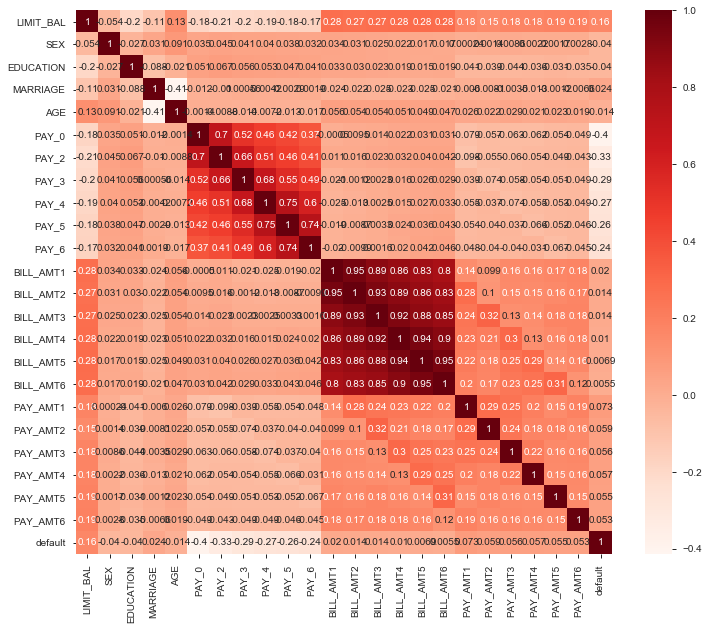

In [27]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
credit_corr = credit.corr()
sns.heatmap(credit_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
#Correlation with output variable
cor_target = abs(credit_corr['LIMIT_BAL'])
#Selecting highly correlated features
irrelevant_features = cor_target[cor_target<0.13]
irrelevant_features

SEX         0.053850
MARRIAGE    0.109183
Name: LIMIT_BAL, dtype: float64

irrelevant_features gives you the set of features which has very less correlation with dependent feature. These features can be removed from the data set.

In [30]:
credit = credit.drop(irrelevant_features.index,axis=1)
credit_samples = credit.sample(100)
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_sample= credit_samples.iloc[:,1:]
y_sample= credit_samples.iloc[:,:1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

In [94]:
credit.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,3,0,2,2,0,0,0,0,0,1,0,0,0,0,0
1,2,3,0,0,2,0,0,0,2,0,1,1,2,0,2,0
2,1,3,2,0,0,0,0,0,0,2,2,1,2,1,5,1
3,0,3,2,0,0,0,0,0,0,2,3,2,2,1,1,1
4,0,3,4,0,0,0,0,0,0,2,7,7,7,0,1,1


In [135]:
credit.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0,3,-1.246078,2,2,0,0,0,0,-0.643117,...,-0.673064,-0.663612,-0.653264,-0.342158,-0.227257,-0.296984,-0.308253,-0.314331,-0.293562,0
1,2,3,-1.029141,0,2,0,0,0,2,-0.659830,...,-0.622219,-0.606802,-0.598525,-0.342158,-0.213767,-0.240218,-0.244454,-0.314331,-0.181119,0
2,1,3,-0.161397,0,0,0,0,0,0,-0.299280,...,-0.450369,-0.417822,-0.392257,-0.250556,-0.192078,-0.240218,-0.244454,-0.248912,-0.012453,1
3,0,3,0.164007,0,0,0,0,0,0,-0.058284,...,-0.233081,-0.187439,-0.157286,-0.221470,-0.169565,-0.228864,-0.238074,-0.244398,-0.237340,1
4,0,3,2.333368,0,0,0,0,0,0,-0.579253,...,-0.347669,-0.348795,-0.332130,-0.221470,1.334009,0.270680,0.265939,-0.269257,-0.255388,1


In [31]:
credit_samples = credit.sample(100)
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_sample= credit_samples.iloc[:,1:]
y_sample= credit_samples.iloc[:,:1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)
X_Strain,X_Stest,y_Strain,y_Stest = train_test_split(X_sample,y_sample,test_size=0.30,random_state=123)

In [137]:
X

,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,3,-1.246078,2,2,0,0,0,0,-0.643117,-0.648006,...,-0.673064,-0.663612,-0.653264,-0.342158,-0.227257,-0.296984,-0.308253,-0.314331,-0.293562,0
1,3,-1.029141,0,2,0,0,0,2,-0.659830,-0.667347,...,-0.622219,-0.606802,-0.598525,-0.342158,-0.213767,-0.240218,-0.244454,-0.314331,-0.181119,0
2,3,-0.161397,0,0,0,0,0,0,-0.299280,-0.494553,...,-0.450369,-0.417822,-0.392257,-0.250556,-0.192078,-0.240218,-0.244454,-0.248912,-0.012453,1
3,3,0.164007,0,0,0,0,0,0,-0.058284,-0.014093,...,-0.233081,-0.187439,-0.157286,-0.221470,-0.169565,-0.228864,-0.238074,-0.244398,-0.237340,1
4,3,2.333368,0,0,0,0,0,0,-0.579253,-0.611935,...,-0.347669,-0.348795,-0.332130,-0.221470,1.334009,0.270680,0.265939,-0.269257,-0.255388,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1,0.380943,0,0,0,0,0,0,1.869003,2.016713,...,0.694467,-0.149982,-0.385023,0.170768,0.610418,-0.012982,-0.113857,0.012763,-0.237340,1
29996,1,0.814815,0,0,0,0,0,0,-0.673393,-0.665900,...,-0.533536,-0.578273,-0.653264,-0.231306,-0.104194,0.213800,-0.300023,-0.314331,-0.293562,1
29997,3,0.164007,4,3,2,0,0,0,-0.647842,-0.644438,...,-0.348632,-0.325182,-0.328336,-0.342158,-0.257145,0.951876,-0.040297,-0.183493,-0.119275,0
29998,1,0.597879,1,0,0,0,0,0,-0.718575,0.409339,...,0.147013,-0.468681,0.168314,4.841417,-0.109269,-0.230113,-0.185376,3.150512,-0.192138,0


# Modelling

In [ ]:
algo = SVC(C=1, kernel= 'linear')
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [73]:
algo = RandomForestClassifier(max_depth=2, random_state=123)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.46      0.89      0.60      2294
           1       0.55      0.35      0.43      2338
           2       0.38      0.23      0.29      2249
           3       0.52      0.41      0.46      2109

    accuracy                           0.47      8990
   macro avg       0.47      0.47      0.44      8990
weighted avg       0.47      0.47      0.44      8990

[[2035  122   98   39]
 [1103  821  259  155]
 [ 777  349  519  604]
 [ 533  211  505  860]]


In [119]:
algo = GradientBoostingClassifier(criterion='friedman_mse', init=None,
          learning_rate=0.2, loss='deviance', max_depth=3,
          max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=80, presort='auto', random_state=123,
          subsample=1.0, verbose=0, warm_start=False)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\ensemble\_gb.py:1337: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  warnings.warn("The parameter 'presort' is deprecated and has no "


              precision    recall  f1-score   support

           0       0.67      0.85      0.75      2294
           1       0.53      0.45      0.48      1465
           2       0.44      0.41      0.42      1846
           3       0.40      0.30      0.34      1617
           4       0.51      0.56      0.53      1768

    accuracy                           0.54      8990
   macro avg       0.51      0.51      0.51      8990
weighted avg       0.52      0.54      0.52      8990

[[1941  102  121   69   61]
 [ 433  653  216   78   85]
 [ 255  271  765  260  295]
 [ 142  118  380  481  496]
 [ 111   84  272  314  987]]


In [120]:
print(accuracy_score(y_test,predic))

0.5369299221357063


In [65]:
algo = DecisionTreeClassifier(random_state=123, max_depth= 3,criterion="entropy",
                             splitter="best",min_samples_split=2)
model = algo.fit(X_train, y_train)
predic = model.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.53      0.78      0.63      2294
           1       0.54      0.22      0.31      2338
           2       0.41      0.54      0.47      2249
           3       0.42      0.34      0.37      2109

    accuracy                           0.47      8990
   macro avg       0.47      0.47      0.45      8990
weighted avg       0.48      0.47      0.45      8990

[[1784    4  300  206]
 [1037  517  443  341]
 [ 332  264 1222  431]
 [ 228  177  992  712]]


On the initail analysis, the highest accuracy is 53%. This is acheived for the algorithm GradientBoostingClassifier.

There can be some features which might cause the algorith to perform poor. Lets take a look into it.

In [37]:
credit_samples = credit.sample(100)
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_sample= credit_samples.iloc[:,1:]
y_sample= credit_samples.iloc[:,:1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)
X_Strain,X_Stest,y_Strain,y_Stest = train_test_split(X_sample,y_sample,test_size=0.30,random_state=123)

In [268]:
algo = GradientBoostingClassifier(criterion='friedman_mse', init=None,
          learning_rate=0.2, loss='deviance', max_depth=3,
          max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=80, presort='auto', random_state=123,
          subsample=1.0, verbose=0, warm_start=False)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75      2294
           1       0.53      0.45      0.48      1465
           2       0.44      0.41      0.42      1846
           3       0.40      0.30      0.34      1617
           4       0.51      0.56      0.53      1768

    accuracy                           0.54      8990
   macro avg       0.51      0.51      0.51      8990
weighted avg       0.52      0.54      0.52      8990

[[1941  102  121   69   61]
 [ 433  653  216   78   85]
 [ 255  271  765  260  295]
 [ 142  118  380  481  496]
 [ 111   84  272  314  987]]


In [270]:
print(accuracy_score(y_test,predic))

0.5369299221357063


Lets see which features are important

In [129]:
import shap
import pdpbox 
import time
from pdpbox import pdp, get_dataset, info_plots
from sklearn.inspection import permutation_importance

In [140]:
names = X.columns.tolist()
names

['EDUCATION',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default']

To compute the shap value, let's use grandiient boosting classifier

In [141]:
# algo = GradientBoostingClassifier(criterion='friedman_mse', init=None,
#           learning_rate=0.2, loss='deviance', max_depth=3,
#           max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
#           min_samples_split=2, min_weight_fraction_leaf=0.0,
#           n_estimators=80, presort='auto', random_state=123,
#           subsample=1.0, verbose=0, warm_start=False)

algo = DecisionTreeClassifier(random_state=123, max_depth= 3,criterion="entropy",
                             splitter="best",min_samples_split=2)

model = algo.fit(X_train, y_train)

In [142]:
print('Computing SHAP...')
tic = time.time()

# Using TreeSHAP, not KernelSHAP. The former runs quicker but only available for tree-based model.
# Example of KernelExplainer: "shap.KernelExplainer(reg.predict, X_test)" Notice you need to assign prediction function and data.
# I test-ran and only to run 100 samples out of 6258, it took 120 seconds!!
explainer = shap.TreeExplainer(model)
print('Expected Value:', explainer.expected_value)
shap_values = explainer.shap_values(X_test)
print("done in {:.3f}s".format(time.time() - tic)) # 0.671s

# # Show how the SHAP values output looks like.
# pd.DataFrame(shap_values,columns=X_test.columns)

Computing SHAP...
Expected Value: [0.25644815 0.1598093  0.20348033 0.18092968 0.19933254]
done in 0.064s


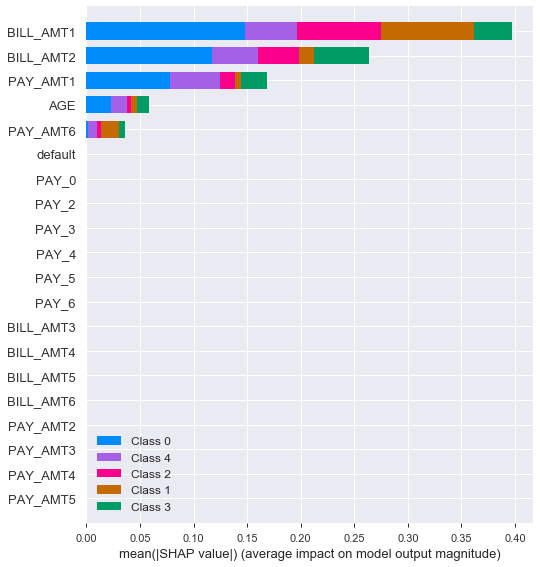

In [143]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

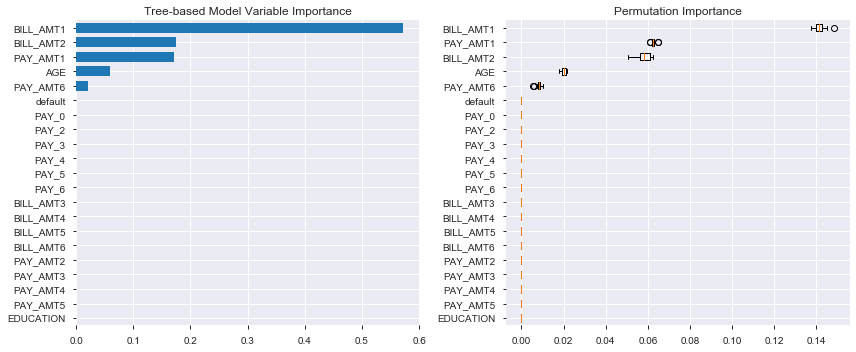

In [144]:
# Getting tree-based model variable importance.
tiout = np.array(model.feature_importances_)/sum(model.feature_importances_)
tree_importance_sorted_idx = np.argsort(tiout)
tree_indices = np.arange(0, len(tiout)) + 0.5

# Getting permutation importance.
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

# Visualize two variable importance plots.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.title.set_text('Tree-based Model Variable Importance')
ax1.barh(tree_indices,
         tiout[tree_importance_sorted_idx], 
         height=0.7)
ax1.set_yticklabels(X_test.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(tiout)))

ax2.title.set_text('Permutation Importance')
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_test.columns[perm_sorted_idx])

fig.tight_layout()
plt.show()

Drop Column feature importance

In [38]:
algo = GradientBoostingClassifier()
model = algo.fit(X_train, y_train)

In [39]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df


# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [40]:
from sklearn.base import clone 


def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

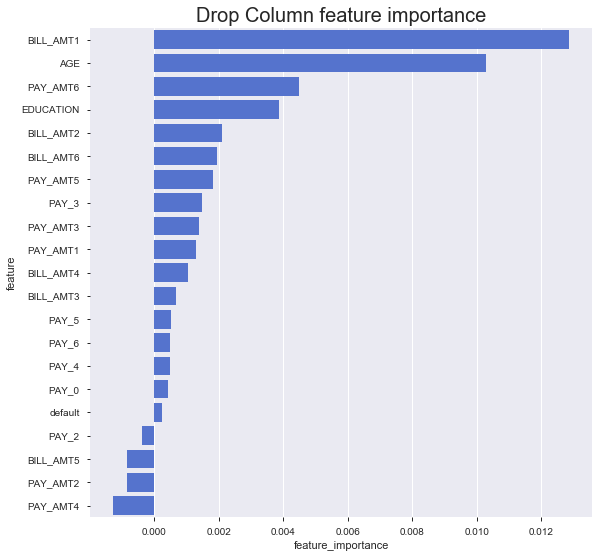

In [41]:
drop_imp = drop_col_feat_imp(model, X_train, y_train)
var_imp_plot(drop_imp, 'Drop Column feature importance')

Feature selection

In [149]:
X_test.columns

Index(['EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [150]:
test = SelectKBest(score_func=f_classif, k=9)
fit = test.fit(X_sample, y_sample)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[2.336 0.555 4.915 4.658 1.45  0.986 0.926 1.086 4.204 2.241 2.563 2.128
 2.21  2.165 4.183 1.374 1.394 1.716 3.72  3.692 2.046]
[[ 3.     2.     2.    -0.643 -0.648 -0.669 -0.342 -0.314 -0.294]
 [ 3.     0.     2.    -0.66  -0.667 -0.64  -0.342 -0.314 -0.181]
 [ 3.     0.     0.    -0.299 -0.495 -0.483 -0.251 -0.249 -0.012]
 [ 3.     0.     0.    -0.058 -0.014  0.032 -0.221 -0.244 -0.237]
 [ 3.     0.     0.    -0.579 -0.612 -0.162 -0.221 -0.269 -0.255]]


In [151]:
credit_samples = credit.sample(100)
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_sample= credit_samples.iloc[:,1:]
y_sample= credit_samples.iloc[:,:1]

feature_names = X.columns

# pipe =  Pipeline([
#   ('feature_selection', SelectFromModel(LinearSVC(loss='l2', penalty='l1', dual=False))),
#   ('classification', RandomForestClassifier())
# ])

class PipelineRFE(Pipeline):

    def fit(self, X, y=None, **fit_params):
        super(PipelineRFE, self).fit(X, y, **fit_params)
        self.feature_importances_ = self.steps[-1][-1].feature_importances_
        return self
    


pipe = PipelineRFE(
    [
        ('std_scaler', preprocessing.StandardScaler()),
        ("ET", GradientBoostingClassifier(criterion='friedman_mse', init=None,
          learning_rate=0.2, loss='deviance', max_depth=3,
          max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=90, presort='auto', random_state=None,
          subsample=1.0, verbose=0, warm_start=False))
    ]
)

# Sets RNG seed to reproduce results (your results should match mine)
_ = StratifiedKFold(random_state=42)

feature_selector_cv = feature_selection.RFECV(pipe, cv=3, step=1, scoring="accuracy")
feature_selector_cv.fit(X_sample, y_sample)

feature_selector_cv.n_features_
cv_grid = (-feature_selector_cv.grid_scores_)
cv_grid

selected_features = feature_names[feature_selector_cv.support_].tolist()
selected_features

['AGE', 'BILL_AMT3', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT4']

# Feature removal

The item selection didnt work. So let us remove some feature

In [34]:
feature = credit.columns.tolist()
items_to_remove= [ 'PAY_AMT4', 'PAY_AMT2',
                  'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6',]

In [35]:
feature = [item for item in feature if item not in items_to_remove]
feature

['LIMIT_BAL',
 'EDUCATION',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT3',
 'PAY_AMT5',
 'PAY_AMT6',
 'default']

In [36]:
credit_samples = credit[feature].sample(100)
X= credit[feature].iloc[:,1:]
y= credit[feature].iloc[:,:1]
X_sample= credit_samples.iloc[:,1:]
y_sample= credit_samples.iloc[:,:1]

# X = StandardScaler().fit_transform(X)
# X

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)
X_Strain,X_Stest,y_Strain,y_Stest = train_test_split(X_sample,y_sample,test_size=0.30,random_state=123)

algo = GradientBoostingClassifier(criterion='friedman_mse', init=None,
          learning_rate=0.2, loss='deviance', max_depth=3,
          max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=80, presort='auto', random_state=123,
          subsample=1.0, verbose=0, warm_start=False)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74      2294
           1       0.54      0.45      0.49      1465
           2       0.45      0.43      0.44      1846
           3       0.40      0.30      0.34      1617
           4       0.51      0.54      0.53      1768

    accuracy                           0.54      8990
   macro avg       0.51      0.51      0.51      8990
weighted avg       0.52      0.54      0.52      8990

[[1943  102  124   72   53]
 [ 448  659  195   79   84]
 [ 258  267  785  245  291]
 [ 166  118  361  478  494]
 [ 118   81  274  335  960]]
0.5367074527252503


If you want to see which model algorithm predicts more good.. lets do the below

In [292]:
C = 1
kernel = 1.0 * RBF([1.0, 1.0])  # for GPC
classifiers = {
    'L1 logistic': LogisticRegression(C=C, penalty='l1',
                                      solver='saga',
                                      multi_class='multinomial',
                                      max_iter=10000),
    'L2 logistic (Multinomial)': LogisticRegression(C=C, penalty='l2',
                                                    solver='saga',
                                                    multi_class='multinomial',
                                                    max_iter=10000),
    'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2',
                                            solver='saga',
                                            multi_class='ovr',
                                            max_iter=10000),
    'Linear SVC': SVC(kernel='rbf', C=C, probability=True,
                      random_state=0),
    'Random Forest': RandomForestClassifier(random_state=123)
#     'GPC': GaussianProcessClassifier(kernel)
}

n_classifiers = len(classifiers)
n_classifiers = len(classifiers)
for index, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_Strain, y_Strain)
    y_pred = classifier.predict(X_Stest)
    accuracy = accuracy_score(y_Stest, y_pred)
    print("Accuracy (train) for %s: %0.1f%% " % (name, accuracy * 100))

Accuracy (train) for L1 logistic: 40.0% 
Accuracy (train) for L2 logistic (Multinomial): 43.3% 
Accuracy (train) for L2 logistic (OvR): 40.0% 
Accuracy (train) for Linear SVC: 33.3% 
Accuracy (train) for Random Forest: 36.7% 


In [293]:
#testing the accuracy with gamma value
algo = SVC()
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1,500,600000]}
clf = GridSearchCV(algo, parameters)
clf.fit(X_Strain,y_Strain)
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1,10,500,600000], 'kernel': ('linear', 'rbf','poly')})
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [294]:
pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

,C,kernel,Accuracy
0,1,linear,0.400000
1,1,rbf,0.300000
2,1,poly,0.242857
3,500,linear,0.357143
4,500,rbf,0.342857
5,500,poly,0.342857
6,600000,linear,0.328571
7,600000,rbf,0.342857
8,600000,poly,0.357143


anaother simple way of making the gridsearch fill the stuff is 

In [295]:
param_grid = {'C':[1,1000,600000], 'kernel':['linear','rbf','poly']}
clf = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
clf.fit(X_Strain,y_Strain)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .................................. C=1, kernel=rbf, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................ C=1000, kernel=linear, total=   0.1s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.1s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.1s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.1s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   0.0s
[CV] C=1000, kernel=rbf ..............................................
[CV] ............................... C=1000, kernel=rbf, total=   0.0s
[CV] C=1000, kernel=rbf ..............................................
[CV] ............................... C=1000, kernel=rbf, total=   0.0s
[CV] C=1000, kernel=rbf ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 1000, 600000],
                         'kernel': ['linear', 'rbf', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [296]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [298]:
predic = clf.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

              precision    recall  f1-score   support

           0       0.40      0.79      0.53      2294
           1       0.25      0.21      0.23      1465
           2       0.35      0.16      0.22      1846
           3       0.34      0.14      0.20      1617
           4       0.37      0.38      0.37      1768

    accuracy                           0.37      8990
   macro avg       0.34      0.33      0.31      8990
weighted avg       0.35      0.37      0.33      8990

[[1807  264   39    5  179]
 [ 733  309  207   22  194]
 [ 763  338  291  127  327]
 [ 639  187  156  224  411]
 [ 540  146  132  287  663]]
0.3664071190211346


In [300]:
algo = GradientBoostingClassifier(criterion='friedman_mse', init=None,
          learning_rate=0.2, loss='deviance', max_depth=3,
          max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=12, min_weight_fraction_leaf=0.0,
          n_estimators=80, presort='auto', random_state=500,
          subsample=1.0, verbose=0, warm_start=False)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74      2294
           1       0.54      0.44      0.49      1465
           2       0.44      0.42      0.43      1846
           3       0.39      0.29      0.33      1617
           4       0.51      0.55      0.53      1768

    accuracy                           0.53      8990
   macro avg       0.51      0.51      0.50      8990
weighted avg       0.52      0.53      0.52      8990

[[1946   95  137   67   49]
 [ 446  651  205   73   90]
 [ 260  263  776  253  294]
 [ 170  108  387  467  485]
 [ 119   87  268  329  965]]
0.5344827586206896


In [ ]:
algo = SVC(C=1, kernel= 'linear')
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
algo = KNeighborsClassifier(n_neighbors=30)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

<ipython-input-38-d62efaeecef5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  predic = algo.fit(X_train, y_train).predict(X_test)


              precision    recall  f1-score   support

           0       0.59      0.82      0.69      2294
           1       0.50      0.40      0.44      1465
           2       0.41      0.41      0.41      1846
           3       0.37      0.29      0.32      1617
           4       0.48      0.42      0.44      1768

    accuracy                           0.49      8990
   macro avg       0.47      0.47      0.46      8990
weighted avg       0.48      0.49      0.48      8990

[[1873   91  138   92  100]
 [ 508  584  185   92   96]
 [ 322  256  749  254  265]
 [ 254  115  437  467  344]
 [ 208  120  337  368  735]]
0.49032258064516127


In [37]:
from sklearn.naive_bayes import GaussianNB
algo = GaussianNB(var_smoothing=1e-09)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

              precision    recall  f1-score   support

           0       0.40      0.88      0.55      2294
           1       0.39      0.40      0.40      1465
           2       0.41      0.20      0.27      1846
           3       0.29      0.10      0.15      1617
           4       0.54      0.28      0.36      1768

    accuracy                           0.40      8990
   macro avg       0.40      0.37      0.34      8990
weighted avg       0.41      0.40      0.36      8990

[[2024  220   37    9    4]
 [ 683  592  148   19   23]
 [ 837  301  369  236  103]
 [ 808  185  174  158  292]
 [ 755  213  182  130  488]]
0.4038932146829811


C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
algo = LogisticRegression(C=1, penalty='l2', solver='saga',multi_class='multinomial',max_iter=10000)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.24      0.06      0.09      2294
           1       0.20      0.01      0.02      1465
           2       0.18      0.02      0.04      1846
           3       0.27      0.00      0.00      1617
           4       0.20      0.92      0.33      1768

    accuracy                           0.20      8990
   macro avg       0.22      0.20      0.10      8990
weighted avg       0.22      0.20      0.10      8990

[[ 132   20  105    3 2034]
 [  58   12   30    1 1364]
 [ 131   18   41    3 1653]
 [ 112    5   30    3 1467]
 [ 117    6   18    1 1626]]
0.2017797552836485


In [36]:
algo = RandomForestClassifier(max_depth=2, random_state=123)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

<ipython-input-36-4008f03f3278>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  predic = algo.fit(X_train, y_train).predict(X_test)


              precision    recall  f1-score   support

           0       0.40      0.97      0.57      2294
           1       0.62      0.18      0.28      1465
           2       0.40      0.37      0.38      1846
           3       0.45      0.01      0.01      1617
           4       0.49      0.37      0.42      1768

    accuracy                           0.43      8990
   macro avg       0.47      0.38      0.33      8990
weighted avg       0.46      0.43      0.36      8990

[[2223   20   27    1   23]
 [ 811  270  351    1   32]
 [ 895   96  674    6  175]
 [ 773   29  358   10  447]
 [ 806   23  277    4  658]]
0.42658509454949944


## PCA

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other.

In [46]:
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

In [47]:
credit.columns

Index(['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

In [49]:
# Separating out the target
features = X.columns.tolist()

PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set. To do this, execute the following code:

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X = sc.transform(X)

In [51]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_trainDf = pd.DataFrame(data = X_train)

The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. Execute the following line of code to find the "explained variance ratio".

In [52]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.27446298, 0.19038417, 0.06973498, 0.04939595, 0.04758486])

In [53]:
ex_variance=np.var(X_train,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.4345774  0.30144924 0.11041652 0.07821224 0.07534461]


In [54]:
finalDf = pd.concat([ y,X_trainDf], axis = 1)
finalDf.head()

,LIMIT_BAL,0,1,2,3,4
0,0.0,-0.946694,-0.552441,0.539742,0.454439,1.828699
1,2.0,-0.969028,-1.087231,0.448526,0.738422,0.140733
2,1.0,-0.986934,-0.804238,1.748709,-1.592999,-1.234587
3,0.0,-1.743952,0.668877,-0.458620,-0.838887,0.716805
4,0.0,-1.171551,-1.125799,0.690212,0.338030,-0.186308


In [55]:
algo = GradientBoostingClassifier(criterion='friedman_mse', init=None,
          learning_rate=0.2, loss='deviance', max_depth=3,
          max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
          min_samples_split=12, min_weight_fraction_leaf=0.0,
          n_estimators=80, presort='auto', random_state=500,
          subsample=1.0, verbose=0, warm_start=False)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\ensemble\_gb.py:1337: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter. We also recommend using HistGradientBoosting models instead.
  warnings.warn("The parameter 'presort' is deprecated and has no "


              precision    recall  f1-score   support

           0       0.59      0.79      0.67      2294
           1       0.48      0.36      0.41      1465
           2       0.41      0.37      0.39      1846
           3       0.36      0.26      0.30      1617
           4       0.47      0.52      0.50      1768

    accuracy                           0.49      8990
   macro avg       0.46      0.46      0.45      8990
weighted avg       0.47      0.49      0.47      8990

[[1823  130  134   95  112]
 [ 542  528  213   75  107]
 [ 341  265  687  245  308]
 [ 225  100  382  413  497]
 [ 178   83  275  312  920]]
0.4862068965517241


In [56]:
algo = SVC(C=1, kernel= 'linear')
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.40      0.92      0.56      2294
           1       0.33      0.06      0.11      1465
           2       0.34      0.30      0.32      1846
           3       0.42      0.01      0.01      1617
           4       0.45      0.46      0.45      1768

    accuracy                           0.40      8990
   macro avg       0.39      0.35      0.29      8990
weighted avg       0.39      0.40      0.32      8990

[[2118   19   94    0   63]
 [ 884   92  364    2  123]
 [ 866  102  554    4  320]
 [ 743   48  344   10  472]
 [ 653   16  283    8  808]]
0.39844271412680754


In [57]:
algo = KNeighborsClassifier(n_neighbors=30)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

<ipython-input-57-d62efaeecef5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  predic = algo.fit(X_train, y_train).predict(X_test)


              precision    recall  f1-score   support

           0       0.58      0.83      0.68      2294
           1       0.44      0.32      0.37      1465
           2       0.38      0.34      0.36      1846
           3       0.35      0.27      0.31      1617
           4       0.48      0.46      0.47      1768

    accuracy                           0.47      8990
   macro avg       0.44      0.45      0.44      8990
weighted avg       0.45      0.47      0.46      8990

[[1897  104  117   90   86]
 [ 595  468  217   90   95]
 [ 371  286  636  271  282]
 [ 242  108  388  437  442]
 [ 179  103  304  360  822]]
0.4738598442714127


In [58]:
from sklearn.naive_bayes import GaussianNB
algo = GaussianNB(var_smoothing=1e-09)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

              precision    recall  f1-score   support

           0       0.39      0.92      0.55      2294
           1       0.49      0.23      0.31      1465
           2       0.39      0.25      0.30      1846
           3       0.31      0.12      0.18      1617
           4       0.55      0.32      0.41      1768

    accuracy                           0.41      8990
   macro avg       0.43      0.37      0.35      8990
weighted avg       0.42      0.41      0.36      8990

[[2118  119   43   11    3]
 [ 760  337  316   31   21]
 [ 908  143  453  204  138]
 [ 866   51  190  198  312]
 [ 816   38  158  185  571]]
0.4090100111234705


C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\naive_bayes.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
algo = LogisticRegression(C=1, penalty='l2', solver='saga',multi_class='multinomial',max_iter=10000)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.41      0.83      0.55      2294
           1       0.29      0.02      0.03      1465
           2       0.31      0.30      0.30      1846
           3       0.34      0.01      0.01      1617
           4       0.39      0.55      0.46      1768

    accuracy                           0.38      8990
   macro avg       0.35      0.34      0.27      8990
weighted avg       0.35      0.38      0.30      8990

[[1897    2  213    3  179]
 [ 817   22  407    1  218]
 [ 778   37  547    8  476]
 [ 647   10  329   12  619]
 [ 520    5  259   11  973]]
0.38387096774193546


In [60]:
algo = RandomForestClassifier(max_depth=2, random_state=123)
predic = algo.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))
print(accuracy_score(y_test,predic))

<ipython-input-60-4008f03f3278>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  predic = algo.fit(X_train, y_train).predict(X_test)


              precision    recall  f1-score   support

           0       0.42      0.95      0.58      2294
           1       0.00      0.00      0.00      1465
           2       0.41      0.36      0.39      1846
           3       0.00      0.00      0.00      1617
           4       0.45      0.54      0.49      1768

    accuracy                           0.42      8990
   macro avg       0.26      0.37      0.29      8990
weighted avg       0.28      0.42      0.32      8990

[[2178    0   20    0   96]
 [ 892    0  457    0  116]
 [ 842    0  671    0  333]
 [ 712    0  288    0  617]
 [ 606    0  203    0  959]]
0.4235817575083426


C:\Users\rayon\Anaconda3\envs\Task1_test\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Applying Pipeline from the start 

In [62]:
credit = pd.read_csv("default of credit card clients.csv", header=1)

In [63]:
credit['default'] = credit['default payment next month']

In [64]:
credit = credit.drop(['ID','default payment next month'], axis=1)
#overriding data set with the same data set after removing duplicate 
credit = credit.drop_duplicates()

In [65]:
disc = feature_discretisers.EqualFrequencyDiscretiser(q =5,variables=['LIMIT_BAL'])    
disc.fit(credit)
credit= disc.transform(credit)
disc.binner_dict_

{'LIMIT_BAL': [-inf, 50000.0, 100000.0, 180000.0, 270000.0, inf]}

In [83]:
X= credit.iloc[:,1:]
y= credit.iloc[:,:1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

Numeric transformer applies a StandardScaler, and includes a SimpleImputer to fill in any missing values.

The categorical transformer also has a SimpleImputer with a different fill method, and leverages OneHotEncoder to transform the categorical values into integers.

In [84]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Next we use the ColumnTransformer to apply the transformations to the correct columns in the dataframe. Before building this I have stored lists of the numeric and categorical columns using the pandas dtype method.

In [85]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

categorical_features = X.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Fitting the classifier

The next step is to create a pipeline that combines the preprocessor created above with a classifier. In this case I have used a simple RandomForestClassifier to start with.

In [86]:
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestClassifier())])

In [87]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [88]:
rf.score(X_test, y_test)

0.5370411568409343

In [89]:
classifiers = [
    SVC(kernel="rbf", C=0.025),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
   KNeighborsClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print(classifier)
    print("model score: %.3f" % pipe.score(X_test, y_test))

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
model score: 0.476
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model score: 0.435
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=N

GradientBoostingClassifier, gives the highest score which is about 54%